In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
df = pd.read_csv('/content/kidney_disease_dataset.csv')
df

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0
...,...,...,...,...,...,...,...,...,...
2299,89,1.11,5.0,1,0,55.1,1344.0,1,0
2300,89,0.30,5.0,0,0,47.5,2156.0,1,0
2301,84,0.30,7.3,1,0,120.0,1353.0,0,0
2302,24,1.58,26.4,1,0,75.6,1067.0,0,0


In [ ]:
df.isna().sum()

,0
Age,0
Creatinine_Level,0
BUN,0
Diabetes,0
Hypertension,0
GFR,0
Urine_Output,0
CKD_Status,0
Dialysis_Needed,0


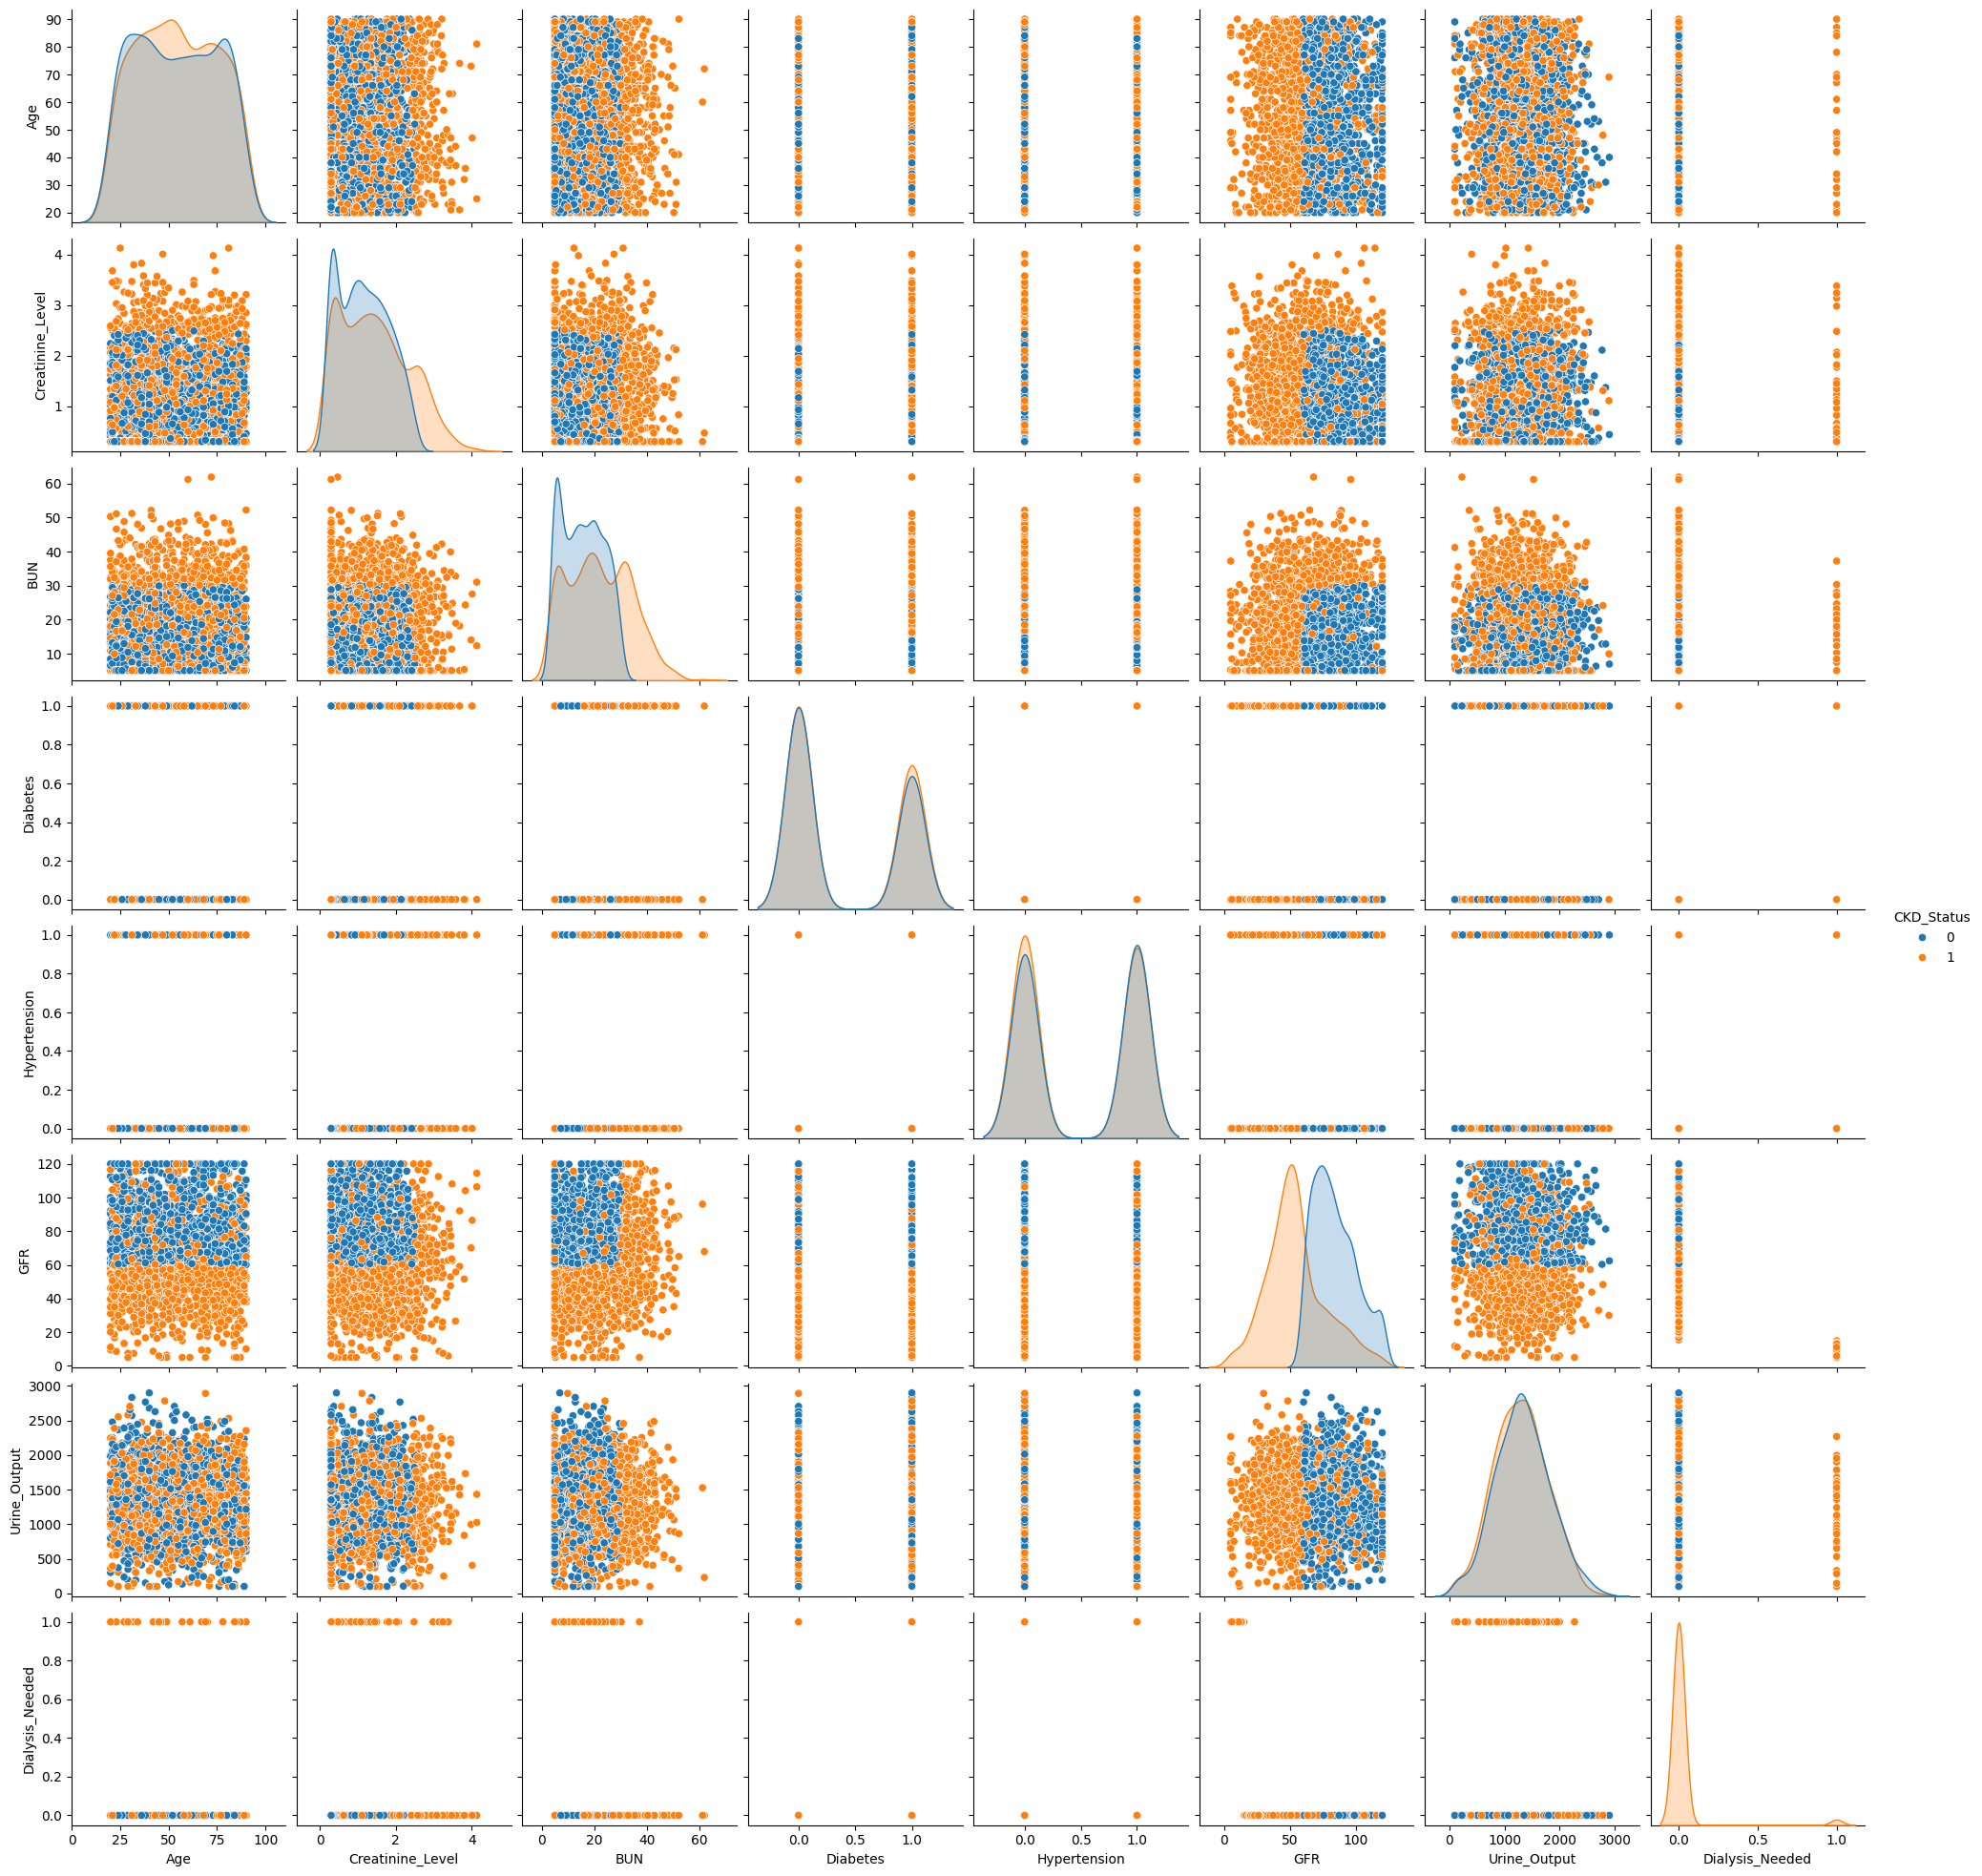

In [ ]:
sns.pairplot(df,hue='CKD_Status')

<Axes: >

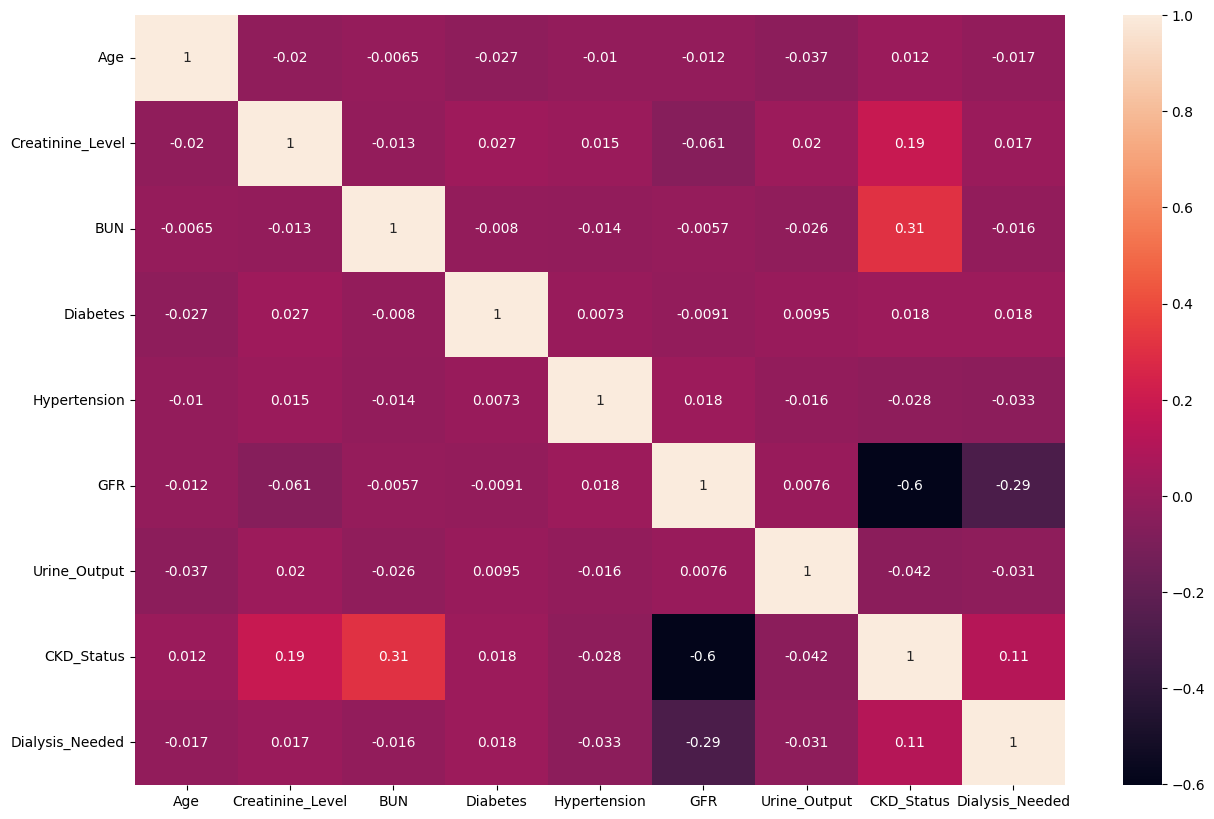

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Dialysis_Needed'].value_counts()

,count
Dialysis_Needed,
0,2273
1,31


In [ ]:
df['CKD_Status'].value_counts()

,count
CKD_Status,
1,1172
0,1132


In [ ]:
x = df.drop('CKD_Status', axis=1)
y = df['CKD_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1843, 8), (461, 8), (1843,), (461,))

In [ ]:
rn = RandomForestClassifier()
rn.fit(x_train, y_train)
y_pred = rn.predict(x_test)

In [ ]:
rn.score(x_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       248

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461



In [ ]:
print("Enter patient details:")

age = float(input("Age: "))
creatinine = float(input("Creatinine_Level: "))
bun = float(input("BUN: "))
diabetes = int(input("Diabetes (0 = No, 1 = Yes): "))
hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))
gfr = float(input("GFR: "))
urine_output = float(input("Urine_Output: "))


user_data = pd.DataFrame([
    {
        'Age': age,
        'Creatinine_Level': creatinine,
        'BUN': bun,
        'Diabetes': diabetes,
        'Hypertension': hypertension,
        'GFR': gfr,
        'Urine_Output': urine_output,
        'Dialysis_Needed': 0
    }
])

prediction = rn.predict(user_data)[0]

if prediction == 1:
    print("Model prediction: CKD Present")
else:
    print("Model prediction: No CKD")

Enter patient details:
Age: 30
Creatinine_Level: 1.2
BUN: 22
Diabetes (0 = No, 1 = Yes): 1
Hypertension (0 = No, 1 = Yes): 1
GFR: 60
Urine_Output: 1200
Model prediction: No CKD
